## <font color=blue>Diabetes dataset<font>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from tqdm import tqdm
from sklearn.decomposition import PCA



In [3]:
# df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:500,2:]
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [35]:
df.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glipizide-metformin_cat,diag_3_cat,...,troglitazone_cat,max_glu_serum_cat,admission_type_id_cat,glyburide-metformin_cat,medical_specialty_cat,repaglinide_cat,change_cat,admission_source_id_cat,rosiglitazone_cat,gender_cat
time_in_hospital,1.000000,0.285836,0.156216,0.443719,-0.010661,-0.010211,0.077726,0.238615,0.000853,0.053194,...,0.006460,-0.028504,-0.027140,-0.001346,0.033617,0.037885,-0.126059,0.045075,-0.004678,-0.035797
num_lab_procedures,0.285836,1.000000,0.054935,0.240163,-0.032496,-0.015043,0.029158,0.145868,-0.003196,-0.006586,...,0.004364,0.014091,-0.136909,-0.021229,-0.137532,0.012526,-0.062934,0.295960,-0.015495,-0.006756
num_procedures,0.156216,0.054935,1.000000,0.367001,0.002695,-0.031982,-0.057386,0.081702,0.004017,0.023773,...,-0.005369,0.018606,0.123681,0.004998,0.116699,-0.004159,-0.009376,-0.206571,0.002323,0.068892
num_medications,0.443719,0.240163,0.367001,1.000000,0.052192,0.015000,0.057188,0.248408,0.002760,0.032961,...,0.003520,-0.019177,0.088678,0.011366,0.128005,0.020959,-0.264186,-0.130563,0.046611,-0.027408
number_outpatient,-0.010661,-0.032496,0.002695,0.052192,1.000000,0.079350,0.101074,0.076559,0.003550,0.015724,...,-0.001712,-0.004502,0.068914,0.005274,0.048809,-0.006734,-0.040385,-0.085552,0.006795,0.001055
number_emergency,-0.010211,-0.015043,-0.031982,0.015000,0.079350,1.000000,0.277399,0.056019,-0.000849,0.011627,...,-0.001200,-0.005485,-0.019997,0.009790,-0.020176,0.007345,-0.057732,0.063111,-0.006618,-0.015149
number_inpatient,0.077726,0.029158,-0.057386,0.057188,0.101074,0.277399,1.000000,0.120946,-0.002240,0.023435,...,-0.003168,-0.011124,-0.038684,-0.015012,-0.025713,0.013412,-0.035399,0.071874,-0.026164,-0.010575
number_diagnoses,0.238615,0.145868,0.081702,0.248408,0.076559,0.056019,0.120946,1.000000,0.004162,0.135753,...,0.004220,0.010910,-0.079828,0.001491,-0.073218,0.053834,-0.084529,0.069429,-0.014103,0.003388
glipizide-metformin_cat,0.000853,-0.003196,0.004017,0.002760,0.003550,-0.000849,-0.002240,0.004162,1.000000,0.007484,...,-0.000028,0.000200,-0.003820,0.052885,0.001010,-0.000611,-0.004767,0.004134,-0.001168,0.004870
diag_3_cat,0.053194,-0.006586,0.023773,0.032961,0.015724,0.011627,0.023435,0.135753,0.007484,1.000000,...,-0.003292,0.004427,-0.003827,-0.004144,0.022792,0.001300,-0.007939,-0.009449,-0.008602,0.002740


In [5]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,8,26,17,14,18,73,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,1,1,7,3,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,53990,60234,57494,17756,40256,49949,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [6]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
Categories (6, object): [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
**************************************************
gender [Female, Male, Unknown/Invalid]
Categories (3, object): [Female, Male, Unknown/Invalid]
**************************************************
age [[0-10), [10-20), [20-30), [30-40), [40-50), [50-60), [60-70), [70-80), [80-90), [90-100)]
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]
**************************************************
weight [?, [75-100), [50-75), [0-25), [100-125), [25-50), [125-150), [175-200), [150-175), >200]
Categories (10, object): [?, [75-100), [50-75), [0-25), ..., [125-150), [175-200), [150-175), >200]
**************************************************
admission_type_id [6, 1, 2, 3, 4, 5, 8, 7]
Categories (8, object): [6, 1, 2, 3, 4, 5, 8, 7]
**************************************************
discharge_disposition_

### <font color =blue>1. remove columns with missing data</font>

In [7]:
#replacing medical speciality with missing
df["medical_specialty"].replace('?', 'missing')
df = df.drop(columns=['weight', 'payer_code'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30


### <font color=blue> 2. remove incomplete columns and rows </font>

In [8]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(49734, 46)

In [9]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [10]:
show_unique(df)

race [Caucasian, Other, AfricanAmerican, Asian, Hispanic]
Categories (5, object): [Caucasian, Other, AfricanAmerican, Asian, Hispanic]
**************************************************
gender [Female, Male]
Categories (2, object): [Female, Male]
**************************************************
age [[90-100), [40-50), [80-90), [50-60), [70-80), [60-70), [30-40), [20-30), [10-20), [0-10)]
Categories (10, object): [[90-100), [40-50), [80-90), [50-60), ..., [30-40), [20-30), [10-20), [0-10)]
**************************************************
admission_type_id [3, 1, 6, 2, 5, 8, 4]
Categories (7, object): [3, 1, 6, 2, 5, 8, 4]
**************************************************
discharge_disposition_id [3, 6, 1, 2, 5, ..., 9, 24, 28, 19, 27]
Length: 26
Categories (26, object): [3, 6, 1, 2, ..., 24, 28, 19, 27]
**************************************************
admission_source_id [4, 7, 1, 5, 17, ..., 9, 14, 10, 22, 13]
Length: 14
Categories (14, object): [4, 7, 1, 5, ..., 14, 10, 22, 13]

### <font color = blue>3. categorical variables</font>

In [11]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [12]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')

In [13]:
df['readmitted'].head(11)

9      NO
12    <30
13     NO
17     NO
26     NO
27    >30
29    >30
32    >30
35    >30
40    >30
43    >30
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [14]:
df['readmitted_cat'].head(11)

9     2
12    0
13    2
17    2
26    2
27    1
29    1
32    1
35    1
40    1
43    1
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [15]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int32
num_lab_procedures    int32
num_procedures        int32
num_medications       int32
number_outpatient     int32
number_emergency      int32
number_inpatient      int32
number_diagnoses      int32
dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [17]:
X_train.shape

(37300, 40)

In [18]:
y_train.head(2)

49089    2
7483     1
Name: readmitted_cat, dtype: int8

In [19]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glipizide-metformin_cat,diag_3_cat,...,troglitazone_cat,max_glu_serum_cat,admission_type_id_cat,glyburide-metformin_cat,medical_specialty_cat,repaglinide_cat,change_cat,admission_source_id_cat,rosiglitazone_cat,gender_cat
31898,6,47,3,64,0,0,0,7,0,192,...,0,2,1,1,40,1,1,5,1,1
4073,2,59,0,8,0,0,0,8,0,408,...,0,2,0,1,13,1,1,8,1,0


In [20]:
y_test.head(2)

31898    2
4073     2
Name: readmitted_cat, dtype: int8

### <font color=blue>5. min max scaling</font>

#### before scale

In [21]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)
X_train.shape

(37300, 40)

In [22]:
#Concatenate Num and cat
# X_cat = X_train.drop(to_num,axis = 1)
# X_train1 = pd.concat([X_train_num,X_cat], axis = 1)

#Need to concatenete Num 

#### after scale

## <font color=green> Baseline</font>

In [23]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.55
test accuracy: 0.55
Wall time: 29.1 ms


Micro-averaged precision = 0.55 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged precision = 0.18 (treat classes equally)
Micro-averaged f1 = 0.55 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged f1 = 0.24 (treat classes equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1380
          1       0.00      0.00      0.00      4232
          2       0.55      1.00      0.71      6822

avg / total       0.30      0.55      0.39     12434



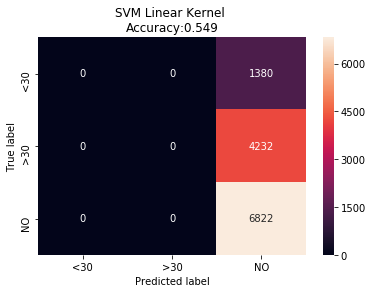

In [24]:
def plot_confusion(clf):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc))

plot_confusion(d_major)

[LibLinear]training accuracy: 0.58
test accuracy: 0.57
Micro-averaged precision = 0.57 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged precision = 0.35 (treat classes equally)
Micro-averaged f1 = 0.57 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged f1 = 0.32 (treat classes equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1380
          1       0.46      0.18      0.25      4232
          2       0.58      0.92      0.71      6822

avg / total       0.47      0.57      0.48     12434

Wall time: 12.7 s


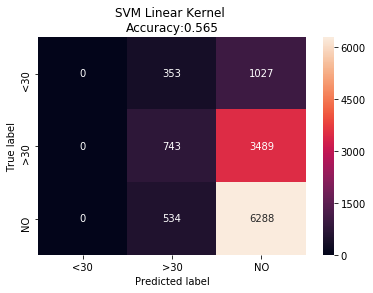

In [25]:
%%time
clf = LinearSVC(verbose=True).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf)

## <font color=green>SVM</font>

### <font color=green>optimise over accuracy</font>

In [26]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = LinearSVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000]}  
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs=4)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)
#Grid best score (accuracy):  0.5618923292402671
#Grid best score (accuracy):  0.5751206434316354(adding medical speciality)

Grid best parameter (max. accuracy):  {'C': 1}
Grid best score (accuracy):  0.5751206434316354
Wall time: 1min 53s


In [27]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:7]

C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\

,mean_test_score,mean_train_score,param_C,params,rank_test_score
1,0.575121,0.576139,1,{'C': 1},1
2,0.575013,0.576260,10,{'C': 10},2
0,0.574879,0.575214,0.1,{'C': 0.1},3
3,0.543619,0.541970,100,{'C': 100},4
4,0.495094,0.494532,1000,{'C': 1000},5


Micro-averaged precision = 0.57 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged precision = 0.35 (treat classes equally)
Micro-averaged f1 = 0.57 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged f1 = 0.32 (treat classes equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1380
          1       0.46      0.18      0.25      4232
          2       0.58      0.92      0.71      6822

avg / total       0.47      0.57      0.48     12434



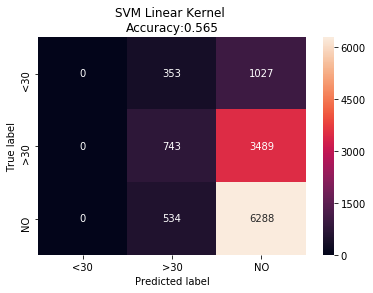

In [28]:
plot_confusion(grid_clf_acc)
#SVM linear acc: 0.565(added medical speciality)

In [29]:
X_train.to_csv("Xtrain.csv")

# Applying PCA

In [30]:
pca = PCA(n_components = 8)
pca.fit(X_train)
variance = pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features



array([22.3, 39. , 47.7, 54.8, 60.8, 66.1, 70.7, 74.1])

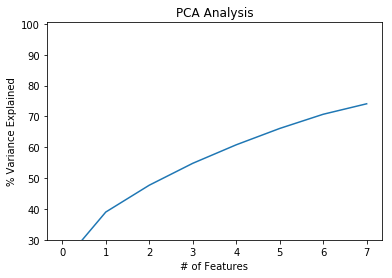

In [31]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

In [32]:
pca.fit(X_train)
pca.fit(X_test)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [33]:
%%time
clf = LinearSVC()
#clf.fit(X_t_train, y_train)
grid_values = [
  {'C': [0.1, 1, 10, 100, 1000]}  
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs=4)
grid_clf_acc.fit(X_t_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_t_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)
#Grid best score (accuracy):  0.5618923292402671
#Grid best score (accuracy):  0.5751206434316354(adding medical speciality)
#score 0.5486569084767573 2
#PCA 0.5724396782841823 8 components

Grid best parameter (max. accuracy):  {'C': 100}
Grid best score (accuracy):  0.5519839142091153
Wall time: 1min 12s


Micro-averaged precision = 0.55 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged precision = 0.32 (treat classes equally)
Micro-averaged f1 = 0.55 (treat instances equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Macro-averaged f1 = 0.26 (treat classes equally)


C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1380
          1       0.40      0.04      0.07      4232
          2       0.55      0.97      0.70      6822

avg / total       0.44      0.55      0.41     12434



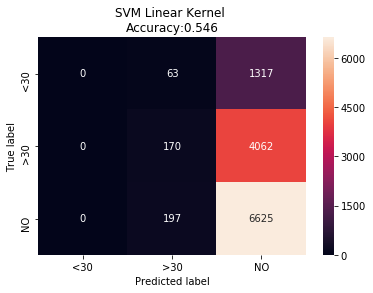

In [34]:
def plot_confusion_pca(clf):
    svm_predicted_mc = clf.predict(X_t_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc))

plot_confusion_pca(grid_clf_acc)
#0.566 PCA 8